Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load data

In [6]:
Training_df = pd.read_csv('data/raw/Training.csv')
Testing_df = pd.read_csv('data/raw/Testing.csv')
Training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [7]:
Testing_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [8]:
Training_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 134 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    itching                         4920 non-null   int64  
 1    skin_rash                       4920 non-null   int64  
 2    nodal_skin_eruptions            4920 non-null   int64  
 3    continuous_sneezing             4920 non-null   int64  
 4    shivering                       4920 non-null   int64  
 5    chills                          4920 non-null   int64  
 6    joint_pain                      4920 non-null   int64  
 7    stomach_pain                    4920 non-null   int64  
 8    acidity                         4920 non-null   int64  
 9    ulcers_on_tongue                4920 non-null   int64  
 10   muscle_wasting                  4920 non-null   int64  
 11   vomiting                        4920 non-null   int64  
 12   burning_micturitio

drop column with NaN values

In [9]:
Training_df['Unnamed: 133'].unique()

array([nan])

In [10]:
Training_df.drop(['Unnamed: 133'], axis=1, inplace=True)

In [11]:
Training_df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


Check if there are any other NaN values in the dataset

In [12]:
Training_df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [13]:
Testing_df.isna().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [14]:
Training_df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
for col in Training_df:
    print(f"{col} has {Training_df[col].unique()}\n")

itching has [1 0]

skin_rash has [1 0]

nodal_skin_eruptions has [1 0]

continuous_sneezing has [0 1]

shivering has [0 1]

chills has [0 1]

joint_pain has [0 1]

stomach_pain has [0 1]

acidity has [0 1]

ulcers_on_tongue has [0 1]

muscle_wasting has [0 1]

vomiting has [0 1]

burning_micturition has [0 1]

spotting_ urination has [0 1]

fatigue has [0 1]

weight_gain has [0 1]

anxiety has [0 1]

cold_hands_and_feets has [0 1]

mood_swings has [0 1]

weight_loss has [0 1]

restlessness has [0 1]

lethargy has [0 1]

patches_in_throat has [0 1]

irregular_sugar_level has [0 1]

cough has [0 1]

high_fever has [0 1]

sunken_eyes has [0 1]

breathlessness has [0 1]

sweating has [0 1]

dehydration has [0 1]

indigestion has [0 1]

headache has [0 1]

yellowish_skin has [0 1]

dark_urine has [0 1]

nausea has [0 1]

loss_of_appetite has [0 1]

pain_behind_the_eyes has [0 1]

back_pain has [0 1]

constipation has [0 1]

abdominal_pain has [0 1]

diarrhoea has [0 1]

mild_fever has [0 1]

In [16]:
Testing_df['fluid_overload'].unique()

array([0], dtype=int64)

Drop fluid_overload column

In [17]:
Training_df.drop(['fluid_overload'], axis=1, inplace=True)
Testing_df.drop(['fluid_overload'], axis=1, inplace=True)

In [18]:
Training_df.columns.tolist()

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering',
 'chills',
 'joint_pain',
 'stomach_pain',
 'acidity',
 'ulcers_on_tongue',
 'muscle_wasting',
 'vomiting',
 'burning_micturition',
 'spotting_ urination',
 'fatigue',
 'weight_gain',
 'anxiety',
 'cold_hands_and_feets',
 'mood_swings',
 'weight_loss',
 'restlessness',
 'lethargy',
 'patches_in_throat',
 'irregular_sugar_level',
 'cough',
 'high_fever',
 'sunken_eyes',
 'breathlessness',
 'sweating',
 'dehydration',
 'indigestion',
 'headache',
 'yellowish_skin',
 'dark_urine',
 'nausea',
 'loss_of_appetite',
 'pain_behind_the_eyes',
 'back_pain',
 'constipation',
 'abdominal_pain',
 'diarrhoea',
 'mild_fever',
 'yellow_urine',
 'yellowing_of_eyes',
 'acute_liver_failure',
 'swelling_of_stomach',
 'swelled_lymph_nodes',
 'malaise',
 'blurred_and_distorted_vision',
 'phlegm',
 'throat_irritation',
 'redness_of_eyes',
 'sinus_pressure',
 'runny_nose',
 'congestion',
 'chest_pain',
 'weakness_in_limbs

In [19]:
Training_df['prognosis'].nunique() # There are 41 diseases in our label column

41

C:\Users\Hossein-Bg\AppData\Local\Temp\ipykernel_14056\243103264.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='prognosis', data=Training_df, order=Training_df['prognosis'].value_counts().index, palette="viridis")
C:\Users\Hossein-Bg\AppData\Local\Temp\ipykernel_14056\243103264.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='prognosis', data=Testing_df, order=Testing_df['prognosis'].value_counts().index, palette="viridis")


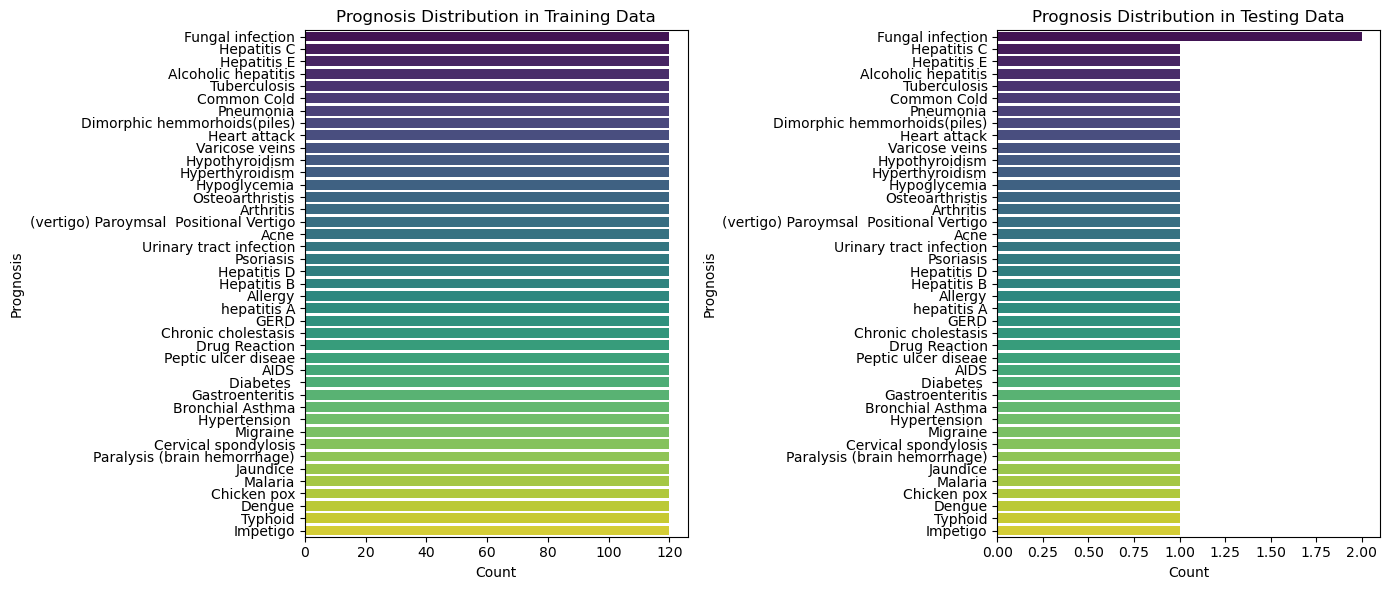

In [20]:
# Visualize the distribution of prognoses in the training and testing datasets
plt.figure(figsize=(14, 6))

# Plot for Training data
plt.subplot(1, 2, 1)
sns.countplot(y='prognosis', data=Training_df, order=Training_df['prognosis'].value_counts().index, palette="viridis")
plt.title("Prognosis Distribution in Training Data")
plt.xlabel("Count")
plt.ylabel("Prognosis")

# Plot for Testing data
plt.subplot(1, 2, 2)
sns.countplot(y='prognosis', data=Testing_df, order=Testing_df['prognosis'].value_counts().index, palette="viridis")
plt.title("Prognosis Distribution in Testing Data")
plt.xlabel("Count")
plt.ylabel("Prognosis")

plt.tight_layout()
plt.show()


Or we could easily use this line of code

In [21]:
# Training_df['prognosis'].value_counts()

This plot allows us to identify the most common symptoms👇👇

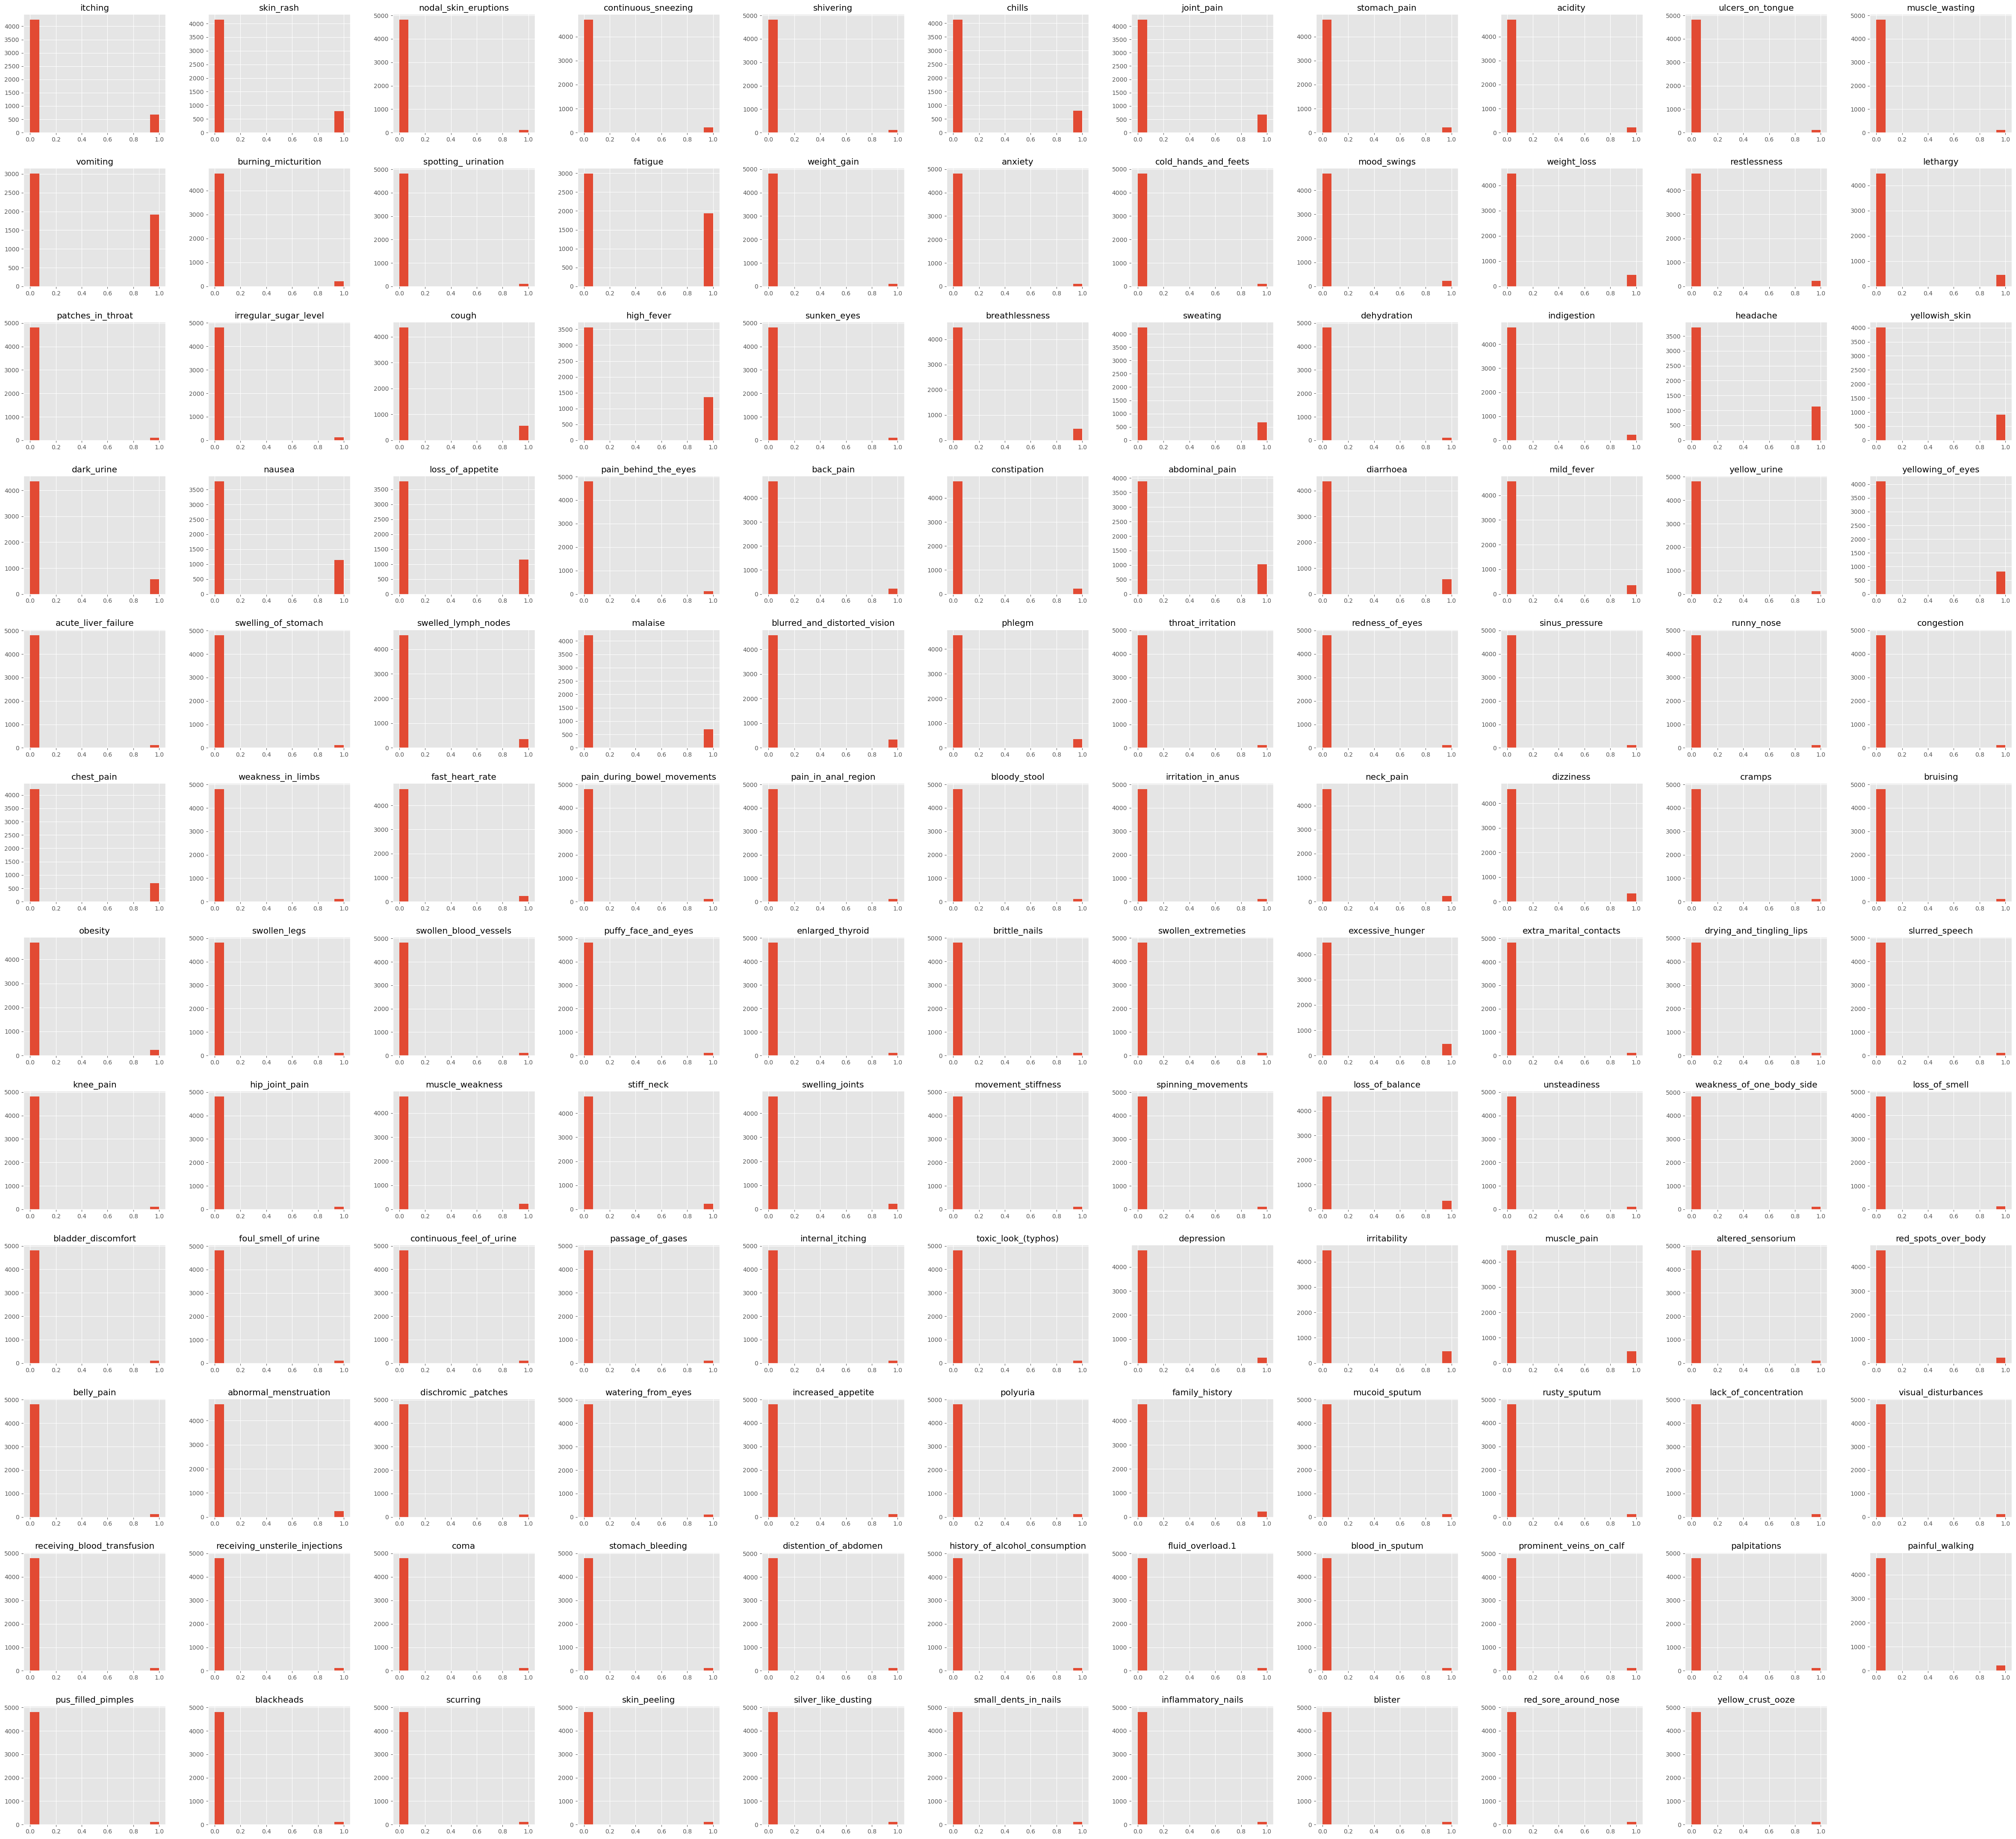

In [22]:
plt.style.use("ggplot")
Training_df.hist(figsize =(60,55),bins='auto')
plt.show()

In [23]:
Training_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

In [24]:
Testing_df.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=132)

Separate features (X) and target (y)

In [25]:
X_train = Training_df.drop(columns=['prognosis'])
y_train = Training_df['prognosis']

X_test = Testing_df.drop(columns=['prognosis'])
y_test = Testing_df['prognosis']

In [26]:
X_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* SimpleImputer: The strategy used here is "most_frequent", but you can adjust it to "mean", "median", or another option based on your data.
* Label Encoding: LabelEncoder is applied to the target prognosis column to convert it into numerical labels.

In [27]:
# Feature Preprocessing Pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')), # handle missing values in numerical features
    ('scaler', StandardScaler()) # Standardize numerical features
])

In [28]:
# Apply preprocessing
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

In [29]:
X_train_processed

array([[ 2.50132708,  2.29336913,  6.6749948 , ..., -0.15401412,
        -0.15401412, -0.15401412],
       [-0.39978778,  2.29336913,  6.6749948 , ..., -0.15401412,
        -0.15401412, -0.15401412],
       [ 2.50132708, -0.4360397 ,  6.6749948 , ..., -0.15401412,
        -0.15401412, -0.15401412],
       ...,
       [-0.39978778, -0.4360397 , -0.14981285, ..., -0.15401412,
        -0.15401412, -0.15401412],
       [-0.39978778,  2.29336913, -0.14981285, ..., -0.15401412,
        -0.15401412, -0.15401412],
       [-0.39978778,  2.29336913, -0.14981285, ...,  6.49291111,
         6.49291111,  6.49291111]])

In [30]:
# Convert processed features back to DataFrame for feature selection
X_train_processed_df = pd.DataFrame(X_train_processed, columns=X_train.columns)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=X_test.columns)

In [32]:
X_train_processed_df.head(3)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,2.501327,2.293369,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014
1,-0.399788,2.293369,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014
2,2.501327,-0.436040,6.674995,-0.21738,-0.149813,-0.439995,-0.401837,-0.21738,-0.21738,-0.149813,...,-0.149813,-0.149813,-0.149813,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014,-0.154014


In [33]:
# Label Encoding for Target
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [34]:
y_train_encoded

array([15, 15, 15, ..., 38, 35, 27])

In [45]:
def select_top_features(X, y, n_features, model):
    """
    Fits the Random Forest model, ranks features by importance, and selects the top N features.
    
    Args:
        X: Training features as a DataFrame.
        y: Target labels as a Series or array.
        n_features: Number of top features to select.
        model: Random Forest model for ranking features.
    
    Returns:
        selected_features: Names of the top N features.
    """

    model.fit(X, y) # Train the Random Forest model

    feature_importance = model.feature_importances_# Get feature importances

    feature_importance_df = pd.DataFrame(data={
        'Feature' : X_train.columns,
        'Importance' : feature_importance
    }).sort_values(by='Importance', ascending=False) # Sort features by importance

    # Visualization
    plt.figure(figsize=(20, 20))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('All Feature Importances')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid()
    plt.show()

    selected_features = feature_importance_df['Feature'].head(n_features).tolist() # Top N features

    return selected_features

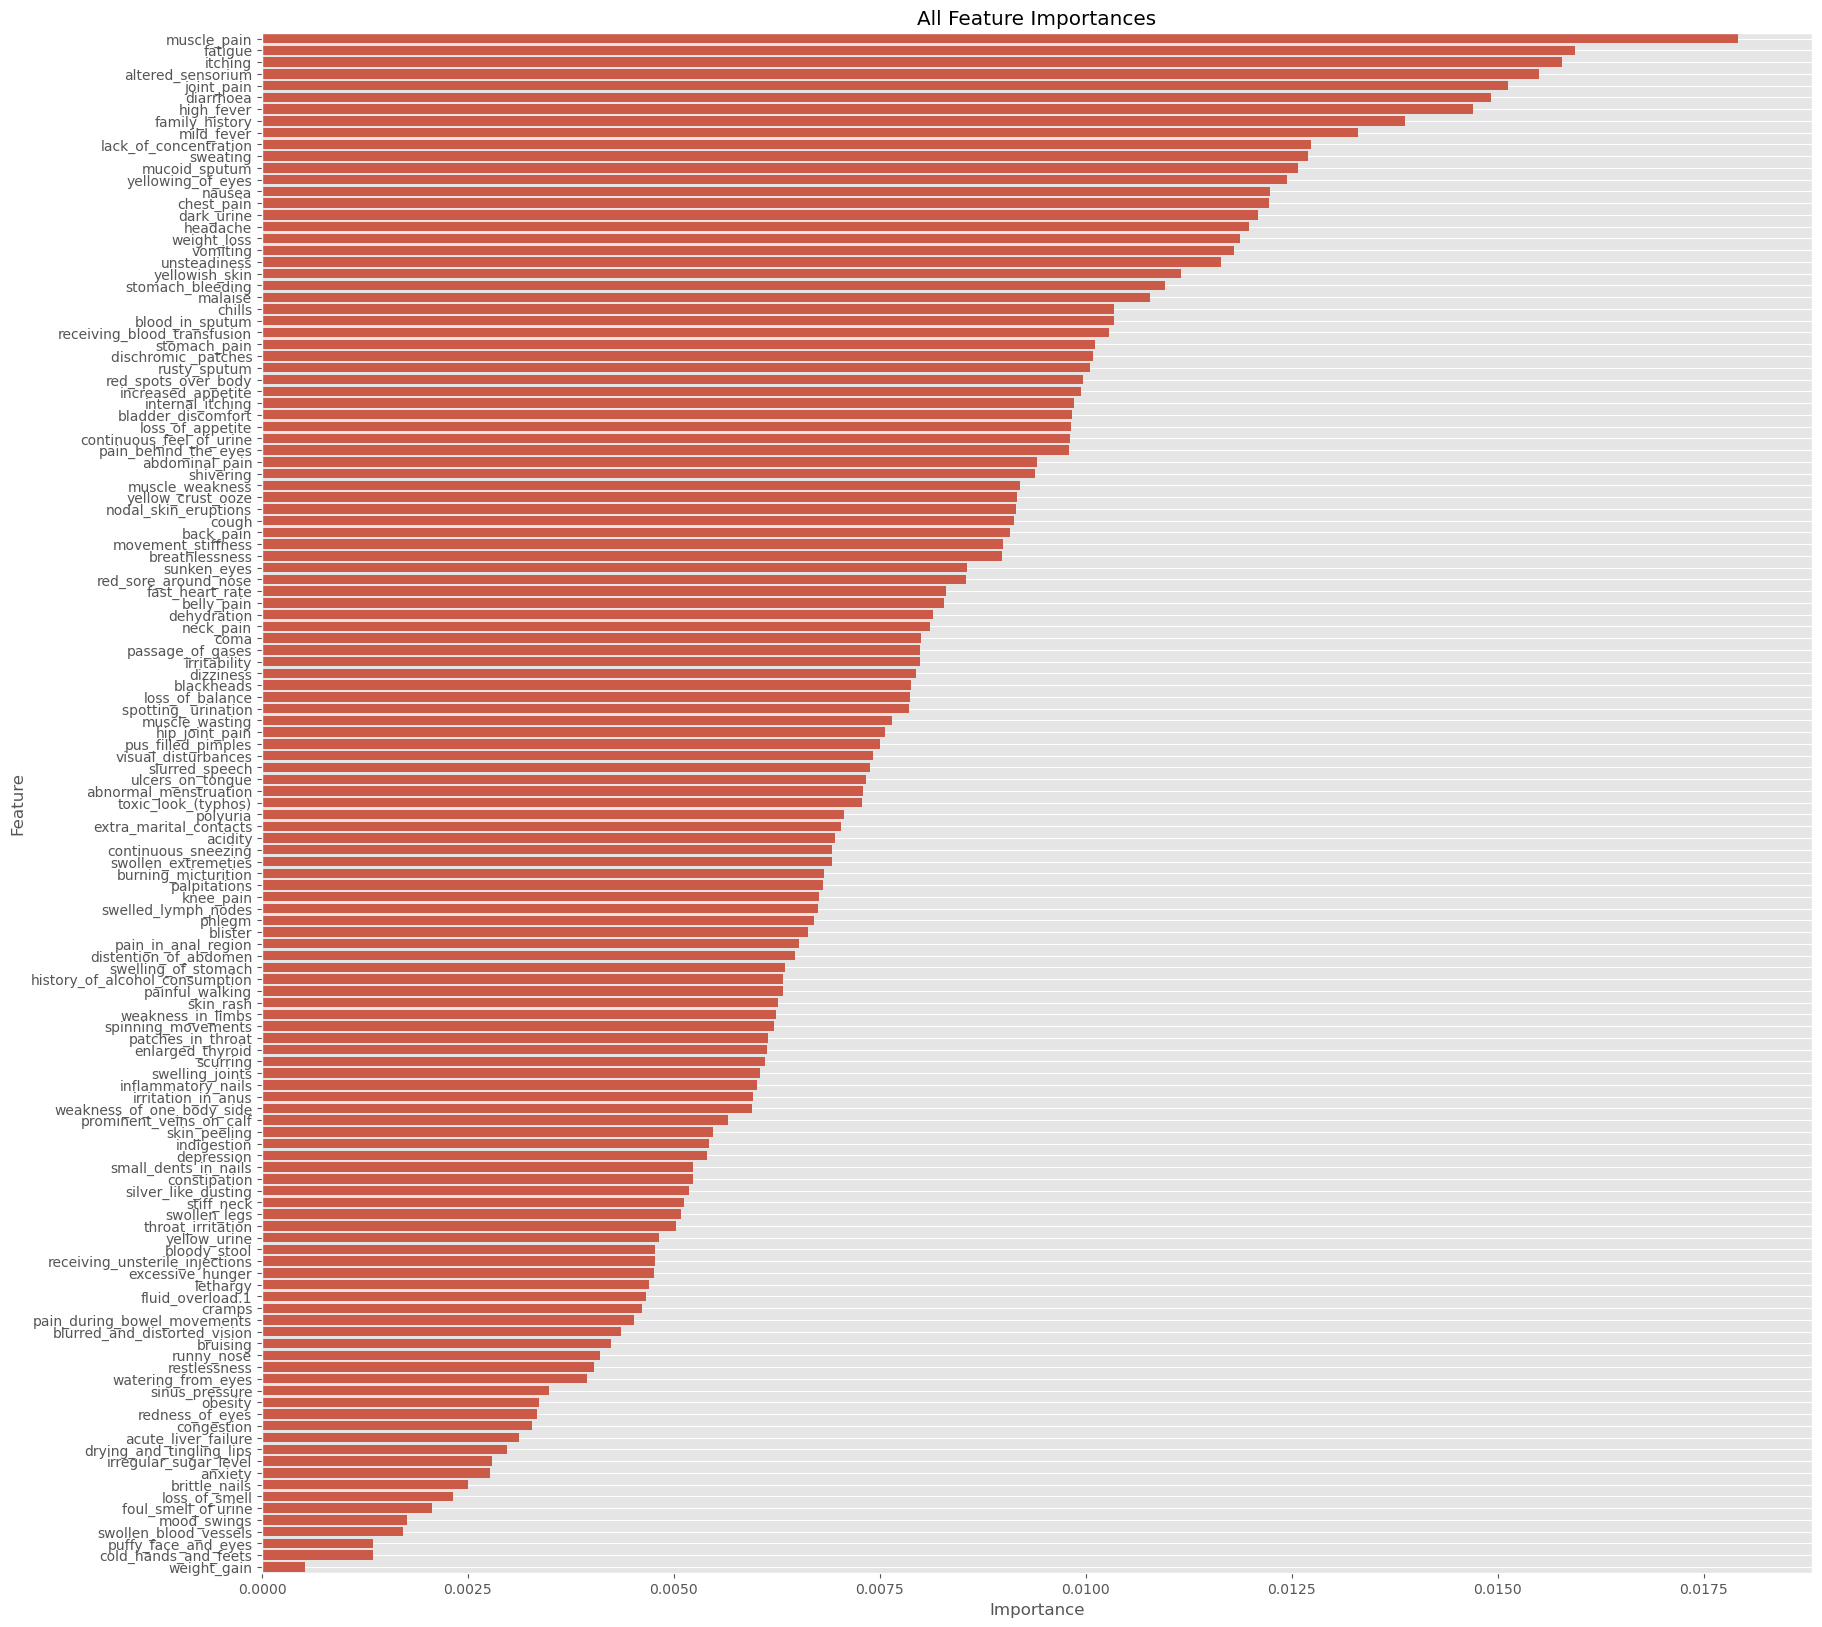

In [46]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
top_n = 50  # Number of top features to select
selected_features = select_top_features(X_train_processed_df, y_train_encoded, top_n, rf_model)

In [47]:
selected_features

['muscle_pain',
 'fatigue',
 'itching',
 'altered_sensorium',
 'joint_pain',
 'diarrhoea',
 'high_fever',
 'family_history',
 'mild_fever',
 'lack_of_concentration',
 'sweating',
 'mucoid_sputum',
 'yellowing_of_eyes',
 'nausea',
 'chest_pain',
 'dark_urine',
 'headache',
 'weight_loss',
 'vomiting',
 'unsteadiness',
 'yellowish_skin',
 'stomach_bleeding',
 'malaise',
 'chills',
 'blood_in_sputum',
 'receiving_blood_transfusion',
 'stomach_pain',
 'dischromic _patches',
 'rusty_sputum',
 'red_spots_over_body',
 'increased_appetite',
 'internal_itching',
 'bladder_discomfort',
 'loss_of_appetite',
 'continuous_feel_of_urine',
 'pain_behind_the_eyes',
 'abdominal_pain',
 'shivering',
 'muscle_weakness',
 'yellow_crust_ooze',
 'nodal_skin_eruptions',
 'cough',
 'back_pain',
 'movement_stiffness',
 'breathlessness',
 'sunken_eyes',
 'red_sore_around_nose',
 'fast_heart_rate',
 'belly_pain',
 'dehydration']

In [48]:
# Select top features from preprocessed data
X_train_selected = X_train_processed_df[selected_features]
X_test_selected = X_test_processed_df[selected_features]

In [49]:
X_train_selected.head(3)

,muscle_pain,fatigue,itching,altered_sensorium,joint_pain,diarrhoea,high_fever,family_history,mild_fever,lack_of_concentration,...,nodal_skin_eruptions,cough,back_pain,movement_stiffness,breathlessness,sunken_eyes,red_sore_around_nose,fast_heart_rate,belly_pain,dehydration
0,-0.326516,-0.804106,2.501327,-0.154014,-0.401837,-0.359829,-0.618708,-0.220439,-0.278441,-0.154014,...,6.674995,-0.359829,-0.220439,-0.154014,-0.317287,-0.149813,-0.154014,-0.223464,-0.154014,-0.149813
1,-0.326516,-0.804106,-0.399788,-0.154014,-0.401837,-0.359829,-0.618708,-0.220439,-0.278441,-0.154014,...,6.674995,-0.359829,-0.220439,-0.154014,-0.317287,-0.149813,-0.154014,-0.223464,-0.154014,-0.149813
2,-0.326516,-0.804106,2.501327,-0.154014,-0.401837,-0.359829,-0.618708,-0.220439,-0.278441,-0.154014,...,6.674995,-0.359829,-0.220439,-0.154014,-0.317287,-0.149813,-0.154014,-0.223464,-0.154014,-0.149813


In [50]:
# Summary
print(f"Selected Features: {selected_features}")
print(f"Processed Training Features Shape: {X_train_selected.shape}")
print(f"Processed Testing Features Shape: {X_test_selected.shape}")

Selected Features: ['muscle_pain', 'fatigue', 'itching', 'altered_sensorium', 'joint_pain', 'diarrhoea', 'high_fever', 'family_history', 'mild_fever', 'lack_of_concentration', 'sweating', 'mucoid_sputum', 'yellowing_of_eyes', 'nausea', 'chest_pain', 'dark_urine', 'headache', 'weight_loss', 'vomiting', 'unsteadiness', 'yellowish_skin', 'stomach_bleeding', 'malaise', 'chills', 'blood_in_sputum', 'receiving_blood_transfusion', 'stomach_pain', 'dischromic _patches', 'rusty_sputum', 'red_spots_over_body', 'increased_appetite', 'internal_itching', 'bladder_discomfort', 'loss_of_appetite', 'continuous_feel_of_urine', 'pain_behind_the_eyes', 'abdominal_pain', 'shivering', 'muscle_weakness', 'yellow_crust_ooze', 'nodal_skin_eruptions', 'cough', 'back_pain', 'movement_stiffness', 'breathlessness', 'sunken_eyes', 'red_sore_around_nose', 'fast_heart_rate', 'belly_pain', 'dehydration']
Processed Training Features Shape: (4920, 50)
Processed Testing Features Shape: (42, 50)


In [51]:
X_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   muscle_pain                  4920 non-null   float64
 1   fatigue                      4920 non-null   float64
 2   itching                      4920 non-null   float64
 3   altered_sensorium            4920 non-null   float64
 4   joint_pain                   4920 non-null   float64
 5   diarrhoea                    4920 non-null   float64
 6   high_fever                   4920 non-null   float64
 7   family_history               4920 non-null   float64
 8   mild_fever                   4920 non-null   float64
 9   lack_of_concentration        4920 non-null   float64
 10  sweating                     4920 non-null   float64
 11  mucoid_sputum                4920 non-null   float64
 12  yellowing_of_eyes            4920 non-null   float64
 13  nausea            

In [52]:
def grid_search(model, param_grid, X_train, y_train, X_test, y_test, scoring='accuracy', cv=5, verbose=1):

    """
    Function to run GridSearchCV on any model with a scoring parameter.
    
    Args:
    - model: The model (estimator) to use (e.g., KNeighborsClassifier(), SVC(), etc.)
    - param_grid: Dictionary with parameters to search (e.g., {'n_neighbors': [3, 5, 7]} for KNN)
    - X_train: Training data features
    - y_train: Training data labels
    - X_test: Testing data features
    - y_test: Testing data labels
    - cv: Number of folds in cross-validation (default: 5)
    - scoring: Scoring metric to evaluate model performance (default: 'accuracy')
    
    Returns:
    - best_model: Best estimator found by GridSearchCV
    - best_params: Best hyperparameters found
    - accuracy: Accuracy (or specified metric) on the test set
    - conf_matrix: Confusion matrix for predictions on the test set
    - class_report: Classification report
    
    """
    # Initialize GridSearchCV with the model, param_grid, cv, and scoring metric
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=cv, verbose=verbose)
    # Fit the model on training data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator and best parameters
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Predict on test data using the best model
    y_pred = best_model.predict(X_test)

    # Calculate the chosen score (e.g., accuracy, precision, etc.)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Print the results
    print(f"Best Parameters: {best_params}")
    print(f"Best Model: {best_model}")
    print(f"Best {scoring.capitalize()} on CV: {grid_search.best_score_:.4f}")
    print(f"Test {scoring.capitalize()}: {accuracy:.4f}")
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", class_report)

    return best_params, best_model, accuracy, conf_matrix, class_report
    

SVM Model

svc: This initializes the SVM classifier (Support Vector Classifier) with default settings. Later, we’ll use GridSearchCV to find the best hyperparameters (like C, kernel, and gamma) for this classifier.

C: Controls the regularization strength. A smaller value of C gives a simpler model but could underfit, while a larger value of C gives a more complex model that fits the training data better but could overfit.

kernel: This specifies the type of kernel function to use. We are testing:
* linear: A linear hyperplane to classify the data.
* rbf: A non-linear radial basis function kernel.
* poly: A polynomial kernel that transforms the input data by raising it to a power.

gamma: Controls the influence of each training example. It’s only used for non-linear kernels like rbf and poly.
* scale: The default value, calculated based on the number of features.
* auto: Sets gamma as 1 / number_of_features.

GridSearchCV: Initializes the grid search with cross-validation.
* estimator=svc: The model we want to optimize is SVC.
* param_grid=param_grid: This is the grid of hyperparameters we want to search through.
* scoring='accuracy': We’re using accuracy as the performance metric to choose the best hyperparameters.
 cv=5: This specifies 5-fold cross-validation, meaning the data will be split into 5 parts. Each combination of parameters will be trained and validated on 5 different subsets of the data to ensure reliable results.
* verbose=1: This will print out progress information during the fitting process.

In [53]:
# Initialize SVC model
svc = SVC()

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}
best_svm_params, best_svm_model, accuracy, conf_matrix, class_report= grid_search(svc, param_grid, X_train_selected, y_train_encoded, X_test_selected, y_test_encoded, scoring='accuracy', cv=5, verbose=1) 


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Model: SVC(C=0.1, kernel='linear')
Best Accuracy on CV: 0.9195
Test Accuracy: 0.9048
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00 

c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m

KNN Model

The K-Nearest Neighbors (KNN) algorithm has several hyperparameters that influence how the model behaves. Each one controls a different aspect of the model's complexity, prediction process, and performance. Here's a detailed explanation of the key hyperparameters in KNN:

1. n_neighbors (k)

Definition: This hyperparameter specifies the number of nearest neighbors to consider when making a prediction.

Effect:

A smaller k (e.g., 1 or 3) makes the model more sensitive to noise in the training data, potentially leading to overfitting.

A larger k smoothens the decision boundary, making the model more robust but possibly less sensitive to nuances, which can lead to underfitting.

Common Values: Typical choices include 3, 5, 7, or even higher values. It is often chosen by cross-validation.

Intuition:

If k = 1, the prediction is based on the single closest neighbor (this can make the model very sensitive to outliers).

If k = 10, the prediction is based on the 10 closest neighbors, which smoothens predictions by taking into account more neighbors' votes.

2. weights

Definition: This controls how the distance to neighbors affects their influence on the prediction. There are two options:

'uniform': All neighbors contribute equally to the prediction.

'distance': Closer neighbors have a larger influence on the prediction than farther ones.

Effect:

'uniform' weights treat all neighbors equally, so distant points may affect predictions similarly to nearby points.

'distance' weights give more importance to closer neighbors, which can result in better performance when the data points are unevenly distributed.

Intuition: 

Using 'distance' can be useful when nearby points are more likely to be similar to the query point, while 'uniform' might work better when the data is fairly homogeneous.

3. p (Minkowski distance parameter)

Definition: This hyperparameter determines the type of distance metric used for calculating the distance between points. It is used in conjunction with the Minkowski distance formula, which generalizes several distance metrics:

p = 1: This corresponds to the Manhattan distance (L1-norm), where distance is the sum of absolute differences.

p = 2: This corresponds to the Euclidean distance (L2-norm), which is the most common distance measure (straight-line distance).

Other values of p: Larger values of p make the distance metric more sensitive to larger differences.

Effect: 

Different distance metrics may be more appropriate depending on the structure of the data. Euclidean distance is often the default, but Manhattan distance can work better in high-dimensional spaces.

In [54]:
knn = KNeighborsClassifier()
param_grid={
    'n_neighbors' : [3, 5, 7, 9, 11],
    'weights' : ['uniform', 'distance'],
    'p' : [1, 2]
}
best_knn_params, best_knn_model, accuracy, conf_matrix, class_report= grid_search(knn, param_grid, X_train_selected, y_train_encoded, X_test_selected, y_test_encoded, scoring='accuracy', cv=5, verbose=1) 


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Model: KNeighborsClassifier(n_neighbors=7, p=1, weights='distance')
Best Accuracy on CV: 0.9195
Test Accuracy: 0.9048
Confusion Matrix:
 [[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00 

c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Hossein-Bg\anaconda3\envs\dsi_participant\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{m